<a href="https://colab.research.google.com/github/mariamejia2703/BigData/blob/master/Copia_de_An%C3%A1lisis_Exploratorio_Rendimiento_Acad%C3%A9mico_Maria_Isabel_Bohorquez_Mejia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introducción.
. En particular, se busca analizar la relación entre el **rendimiento escolar**, representado por el promedio general de notas de cada estudiante, y factores determinantes como el **porcentaje de asistencia a clases, y la razón entre docentes y estudiantes de los establecimientos educacionales**. 

Para este estudio, se utilizarán datos generados y publicados por el  Centro de Estudios del Ministerio de Educación de Chile, https://centroestudios.mineduc.cl/: <br>

*El Centro de Estudios pone a disposición del público en general la plataforma Datos Abiertos para compartir información estadística en materia de educación, que incluye bases de datos de establecimientos educacionales, estudiantes y párvulos, docentes y asistentes de la educación, y sostenedores. Además, se entrega información georreferenciada.*

En este tutorial, nos enfocaremos en el análisis exploratorio de uno de los conjuntos de datos publicados por el MINEDUC, relativo al rendimiento escolar de los estudiantes de Chile en el año 2021.


### 1. Lectura de datos

In [2]:
import numpy as np #manejo de listas (vectores) [a,b,c,d]
import pandas as pd #manejo de DataFrame
import matplotlib.pyplot as plt
import seaborn as sns #visualizaciones

In [21]:
df=pd.read_csv('https://raw.githubusercontent.com/paguirre-uc/mds3020_2022/main/semana5/RendimientoEscolar_EDA.csv')
df.head()

,REGION,RURAL,TIPO_ENSE,EDAD_ALU,PROM_GRAL,ASISTENCIA,SITUACION_FINAL
0,9,0,BASICA,8,7.0,100,P
1,13,0,MEDIA_CH,16,6.7,100,P
2,15,0,MEDIA_CH,17,6.5,90,P
3,9,1,BASICA,9,6.4,100,P
4,13,0,BASICA,13,5.6,79,P


a. ¿Cuántos registros y atributos tiene la base de datos?
b. Revisar la BD y transformar a categoría las variables que sean de este tipo.
c. Renombrar la columna PROM_GRAL como NOTA_FINAL, TIPO_ENSE como NIVEL_EDUCACION y EDAD_ALU como EDAD_ALUMNO 

R// Hay 987653 registros, y 7 atributos. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987653 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REGION           987653 non-null  int64  
 1   RURAL            987653 non-null  int64  
 2   TIPO_ENSE        987653 non-null  object 
 3   EDAD_ALU         987653 non-null  int64  
 4   PROM_GRAL        987653 non-null  float64
 5   ASISTENCIA       987653 non-null  int64  
 6   SITUACION_FINAL  987653 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 52.7+ MB


In [6]:
df['TIPO_ENSE']=df['TIPO_ENSE'].astype('category')

In [11]:
df['SITUACION_FINAL']=df['SITUACION_FINAL'].astype('category')
df['RURAL']=df['RURAL'].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987653 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   REGION           987653 non-null  int64   
 1   RURAL            987653 non-null  category
 2   NIVEL_EDUCACION  987653 non-null  category
 3   EDAD_ALUMNO      987653 non-null  int64   
 4   NOTA_FINAL       987653 non-null  float64 
 5   ASISTENCIA       987653 non-null  int64   
 6   SITUACION_FINAL  987653 non-null  category
dtypes: category(3), float64(1), int64(3)
memory usage: 33.0 MB


In [43]:
df=df.rename(columns={'PROM_GRAL' : 'NOTA_FINAL'})
df=df.rename(columns={'TIPO_ENSE' : 'NIVEL_EDUCACION'})
df=df.rename(columns={'EDAD_ALU' : 'EDAD_ALUMNO'})

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987653 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   REGION           987653 non-null  int64   
 1   RURAL            987653 non-null  category
 2   NIVEL_EDUCACION  987653 non-null  category
 3   EDAD_ALUMNO      987653 non-null  int64   
 4   NOTA_FINAL       987653 non-null  float64 
 5   ASISTENCIA       987653 non-null  int64   
 6   SITUACION_FINAL  987653 non-null  category
dtypes: category(3), float64(1), int64(3)
memory usage: 33.0 MB


### 2. ¿Cuántos estudiantes, tipos de educación, regiones hay? ¿Cuál es la región con más estudiantes?

In [22]:
df.describe()

,REGION,RURAL,EDAD_ALU,PROM_GRAL,ASISTENCIA
count,987653.000000,987653.000000,987653.000000,987653.000000,987653.000000
mean,9.446814,0.079774,10.731128,5.802046,85.660207
std,3.997600,0.270943,4.666320,1.342020,22.693419
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,8.000000,5.500000,85.000000
50%,10.000000,0.000000,11.000000,6.100000,91.000000
75%,13.000000,0.000000,14.000000,6.600000,99.000000
max,16.000000,1.000000,59.000000,7.000000,100.000000


R// Hay 987653 estudiantes.

In [17]:
df['NIVEL_EDUCACION'].value_counts()

BASICA      678915
MEDIA_CH    227763
MEDIA_TP     80975
Name: NIVEL_EDUCACION, dtype: int64

R// Hay 3 tipos de educacion, BASICA, MEDIA_CH Y MEDIA_TP

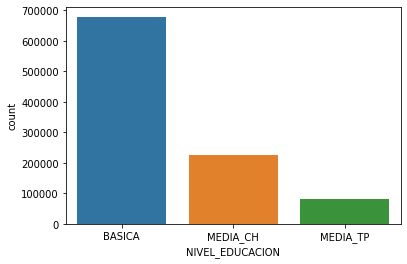

In [15]:
sns.countplot(data=df,x='NIVEL_EDUCACION')

In [18]:
df['REGION'].value_counts()

13    375577
5      98338
8      86823
7      61118
9      58677
6      53462
10     50821
4      46925
2      36446
16     26979
14     22512
1      21974
3      18396
15     14391
12      8693
11      6521
Name: REGION, dtype: int64

R// Hay 16 regiones, de las cuales la 13 es la mas poblada.

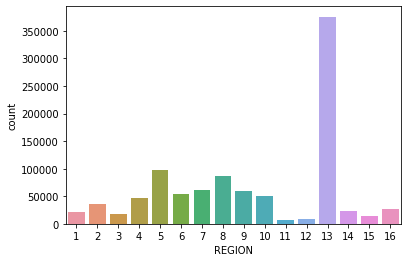

In [16]:
sns.countplot(data=df,x='REGION')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 987653 entries, 0 to 987652
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   REGION           987653 non-null  int64  
 1   RURAL            987653 non-null  int64  
 2   NIVEL_EDUCACION  987653 non-null  object 
 3   EDAD_ALUMNO      987653 non-null  int64  
 4   NOTA_FINAL       987653 non-null  float64
 5   ASISTENCIA       987653 non-null  int64  
 6   SITUACION_FINAL  987653 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 52.7+ MB


### 3. ¿Cómo es en general la distribución del rendimiento académico, la asistencia de los estudiantes y la edad? Haga un gráfico con subplots para mostrar esa distribución. 

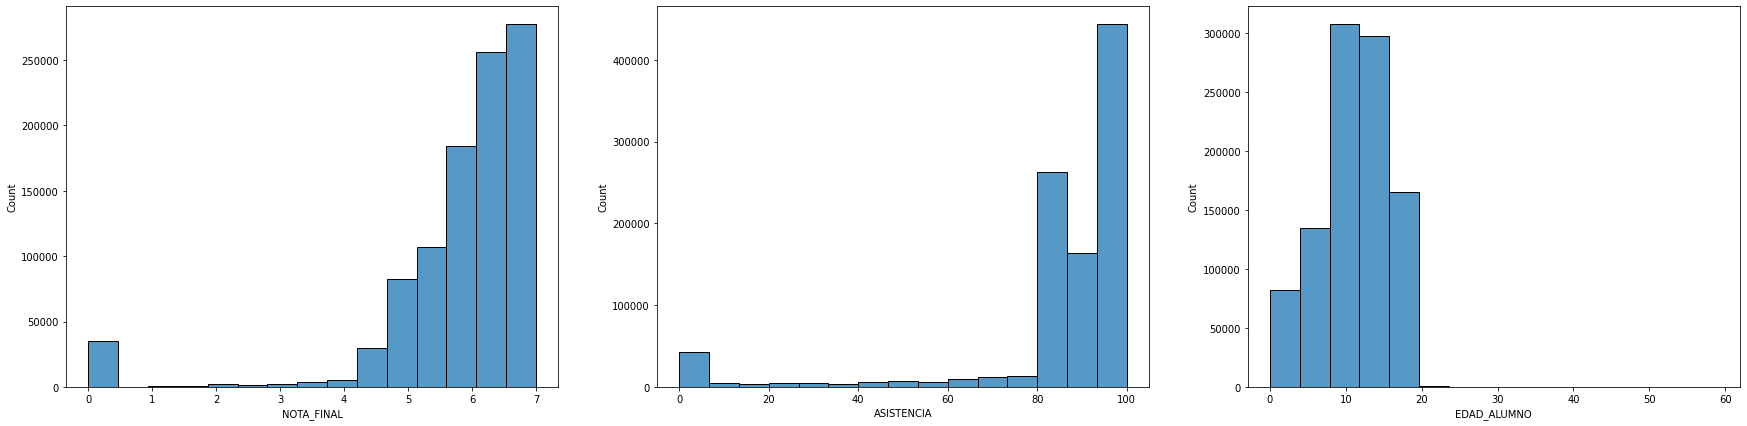

In [49]:
fig=plt.figure(figsize=(30,7))
ax1=fig.add_subplot(131)#definir las variables para distinguir las columnas
ax2=fig.add_subplot(132)
ax3=fig.add_subplot(133)
sns.histplot(data=df,x='NOTA_FINAL', bins=15, ax=ax1)
sns.histplot(data=df,x='ASISTENCIA', bins=15, ax=ax2)
sns.histplot(data=df,x='EDAD_ALUMNO', bins=15, ax=ax3)

###4. ¿Hay valores atípicos en las variables numéricas?

R// si hay valores atipicos en las variables numericas, tal como NOTA_FINAL,ASISTENCIA, EDAD_ALUMNO, exceptuando la variable REGION, que no hay ningun valor atipico. 

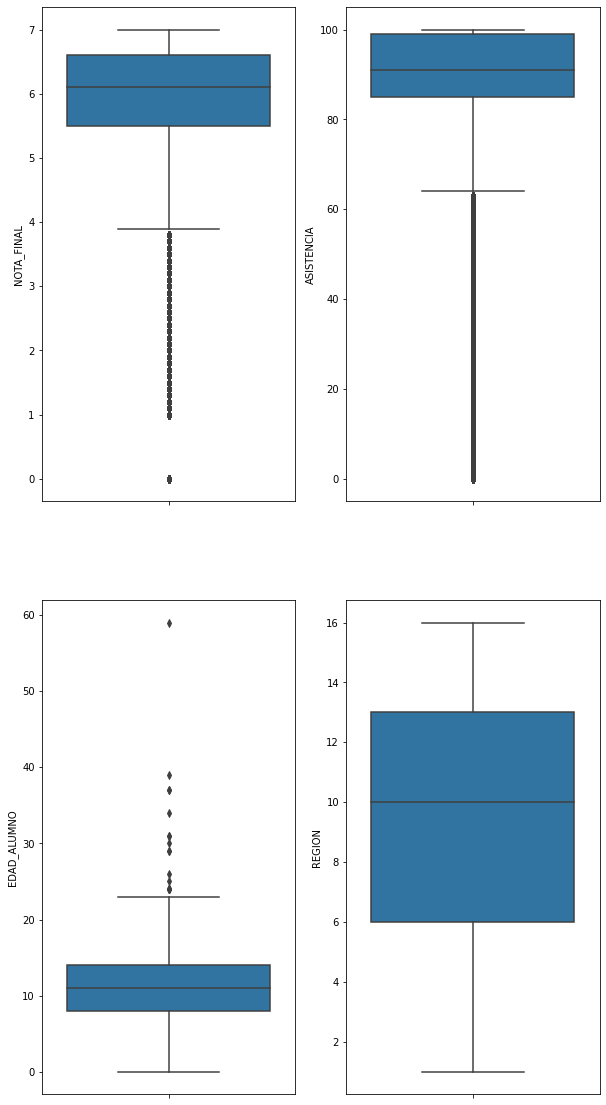

In [53]:
fig,axes=plt.subplots(2,2, figsize=(10,20))
# ax1=fig.add_subplot(131)#definir las variables para distinguir las columnas
# ax2=fig.add_subplot(132)
# ax3=fig.add_subplot(133)
# ax4=fig.add_subplot(134)
sns.boxplot(data=df,y='NOTA_FINAL', ax=axes[0,0])
sns.boxplot(data=df,y='ASISTENCIA', ax=axes[0,1])
sns.boxplot(data=df,y='EDAD_ALUMNO',ax=axes[1,0])
sns.boxplot(data=df,y='REGION',ax=axes[1,1])

5. Realice un histograma de NOTA_FINAL. Consulte la escala de calificaciones en Chile. Observa algo?

La escala de calificaciones en chile es del 2 al 7, siendo el 2 la minima nota, 4 la nota para aprobar y 7 la maxima nota, se puede observar que la mayoria de estudiantes de la variable 'NOTA_FINAL' estan por encima de una nota aceptable y son muy pocos aquellos que la han perdido.

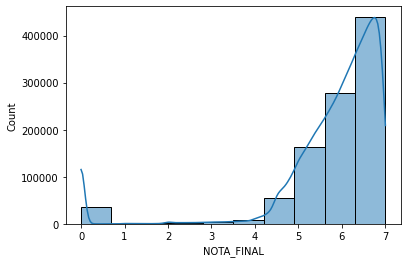

In [56]:
sns.histplot(data=df,x='NOTA_FINAL', bins=10, kde=True)

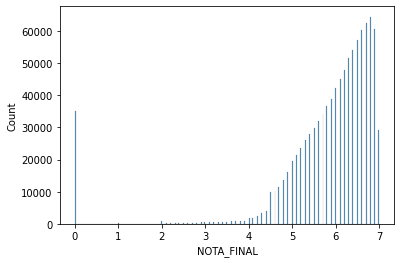

In [58]:
sns.histplot(data=df,x='NOTA_FINAL', stat="count")

**Notas:** Revise la documentación de `seaborn.histplot`y verifique cómo cambian sus gráficos al cambiar los argumentos:`bins`,`stat`,`kde`y otros que llamen su atención.

### 6. ¿Cómo se distribuyen los datos por tipo de educación?

según el grafico se puede observar que la mayoria de estudiantes se encuentran en educacion basica, luego estan en media_ch y por ultimo la minoria en media_tp

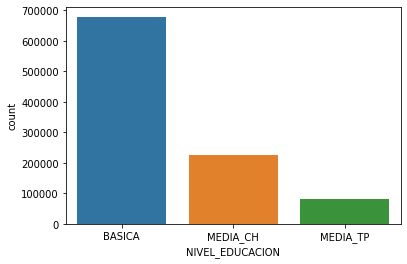

In [59]:
sns.countplot(data=df,x='NIVEL_EDUCACION')

### 7. ¿Cómo se distribuyen los datos de acuerdo a la situación final de los estudiantes?


Segun el grafico podemos observar que la mayoria de estudiantes han sido promovidos.

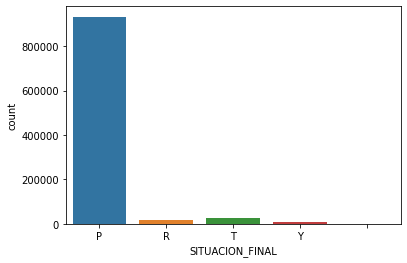

In [60]:
sns.countplot(data=df,x='SITUACION_FINAL')

¿Cuáles son las posibles situaciones finales de un estudiante? ¿Coincide esto con la información inicial?

¿Cómo imputamos los anteriores valores por 'P'? Hint: Funciones anónimas.

¿Qué podemos concluir respecto al análisis exploratorio? 

## Análisis Exploratorio Univariado.

A continuación, agregamos algunos análisis multivariados.

### 1. ¿Cómo varía la asistencia por nivel educacional y zona?

¿Hay menor/mayor asistencia en educación básica que en media? ¿Hay menor/mayor asistencia en zonas rurales/urbanas?

### 2. ¿Cómo varía la asistencia y rendimiento académico por región?


### 3. ¿Hay correlación entre el rendimiento escolar y la asistencia?


4. ¿Qué se puede concluir del análisis?